In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os


In [2]:
os.chdir('C:/02_study/datascience/innomatics')
os.getcwd()

'C:\\02_study\\datascience\\innomatics'

In [3]:
df = pd.read_excel('datasets/simple-linear-regression/BigMac.xlsx')
df.head()

,Big Mac Price ($),Net Hourly Wage ($)
0,1.78,3.3
1,3.84,14.0
2,4.91,4.3
3,3.48,13.9
4,4.00,12.8


In [4]:
df.rename(columns = {'Big Mac Price ($)' : 'Price', 'Net Hourly Wage ($)' : 'Wage'}, inplace = True)

In [5]:
df

,Price,Wage
0,1.78,3.3
1,3.84,14.0
2,4.91,4.3
3,3.48,13.9
4,4.00,12.8
5,3.34,3.1
6,1.95,3.0
7,3.43,5.1
8,4.90,17.7
9,3.33,3.0


In [6]:
df.describe()

,Price,Wage
count,27.000000,27.000000
mean,3.348889,7.725926
std,1.198093,5.927225
min,1.780000,1.300000
25%,2.475000,3.100000
50%,3.330000,5.100000
75%,3.785000,13.150000
max,6.560000,22.600000


In [7]:
df.std()

Price    1.198093
Wage     5.927225
dtype: float64

In [8]:
df.isnull().sum()

Price    0
Wage     0
dtype: int64

In [9]:
Q3 = df.quantile(0.75)
Q1 = df.quantile(0.25)

In [10]:
Q3

Price     3.785
Wage     13.150
Name: 0.75, dtype: float64

In [11]:
Q1

Price    2.475
Wage     3.100
Name: 0.25, dtype: float64

In [12]:
IQR = df.quantile(0.75) - df.quantile(0.25)
IQR

Price     1.31
Wage     10.05
dtype: float64

In [13]:
UB = Q3 + IQR * 1.5
LB = Q1 - IQR * 1.5

In [14]:
UB

Price     5.750
Wage     28.225
dtype: float64

In [15]:
LB

Price     0.510
Wage    -11.975
dtype: float64

In [16]:
df

,Price,Wage
0,1.78,3.3
1,3.84,14.0
2,4.91,4.3
3,3.48,13.9
4,4.00,12.8
5,3.34,3.1
6,1.95,3.0
7,3.43,5.1
8,4.90,17.7
9,3.33,3.0


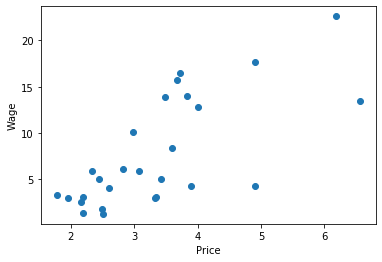

In [17]:
plt.xlabel('Price')
plt.ylabel('Wage')
plt.scatter(df.Price, df.Wage)
plt.show()

In [18]:
# Correlation
print("Correlation:\n", df.corr())

print('------------------------------------------------')
# Covarianace
print("Covariance:\n", df.cov())

Correlation:
           Price      Wage
Price  1.000000  0.717055
Wage   0.717055  1.000000
------------------------------------------------
Covariance:
           Price       Wage
Price  1.435426   5.092068
Wage   5.092068  35.131994


In [19]:
import statsmodels.formula.api as sfa
import statsmodels.api as sa
import lmdiag

In [20]:
model = sfa.ols(formula = 'Wage~Price', data = df).fit()

In [22]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     26.46
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           2.57e-05
Time:                        17:57:57   Log-Likelihood:                -76.104
No. Observations:                  27   AIC:                             156.2
Df Residuals:                      25   BIC:                             158.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1540      2.448     -1.697      0.1

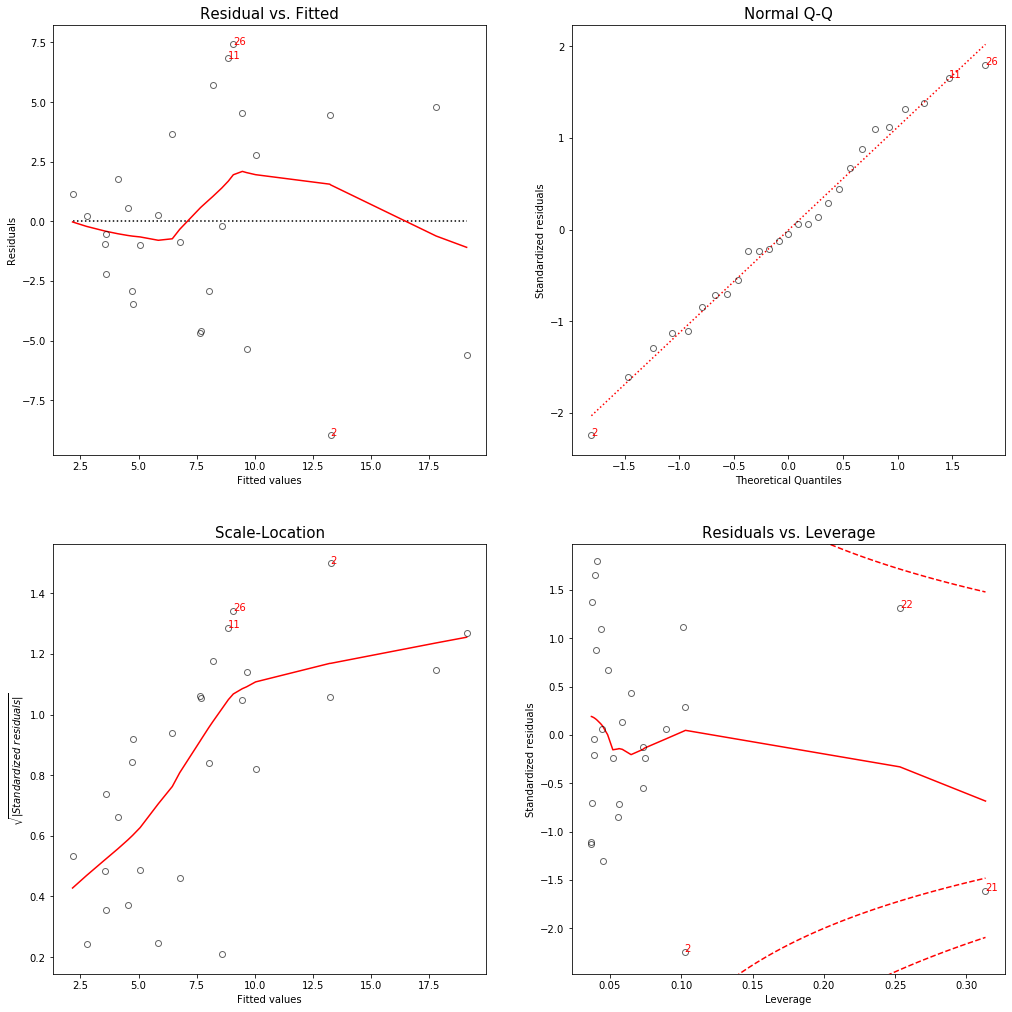

In [23]:
plt.figure(figsize = (14, 14))
lmdiag.plot(model)
plt.show()

In [25]:
fitted_values = model.fittedvalues
residuals = model.resid

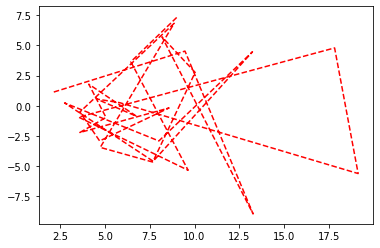

In [27]:
plt.plot(x = fitted_values, residuals, 'r--')i

In [ ]:
# Linear Model for Infections dataset
# Read the data, check the null values, data types
# Check Describe function and understand 

In [47]:
residuals = model.resid

In [48]:
mean = residuals.mean()

In [50]:
std = residuals.std()

In [52]:
lower3 = mean - 3 * std
upper3 = mean + 3 * std

In [53]:
lower3

-12.39412194396783

In [54]:
upper3

12.394121943967823

In [55]:
lower2 = mean - 2 * std
upper2 = mean + 2 * std

In [56]:
lower2

-8.262747962645221

In [57]:
upper2

8.262747962645214